In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer

In [93]:
cancer = load_breast_cancer()

In [94]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [95]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [96]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [97]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

df = scaler.fit_transform(df)

In [101]:
df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [102]:
cov_mat = np.cov(df.T)

# Covarinace Matrix

In [103]:
print(cov_mat)

[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05192783e-01  1.19415220e-01]
 [ 9.9

In [104]:
cov_mat.shape

(30, 30)

<AxesSubplot:>

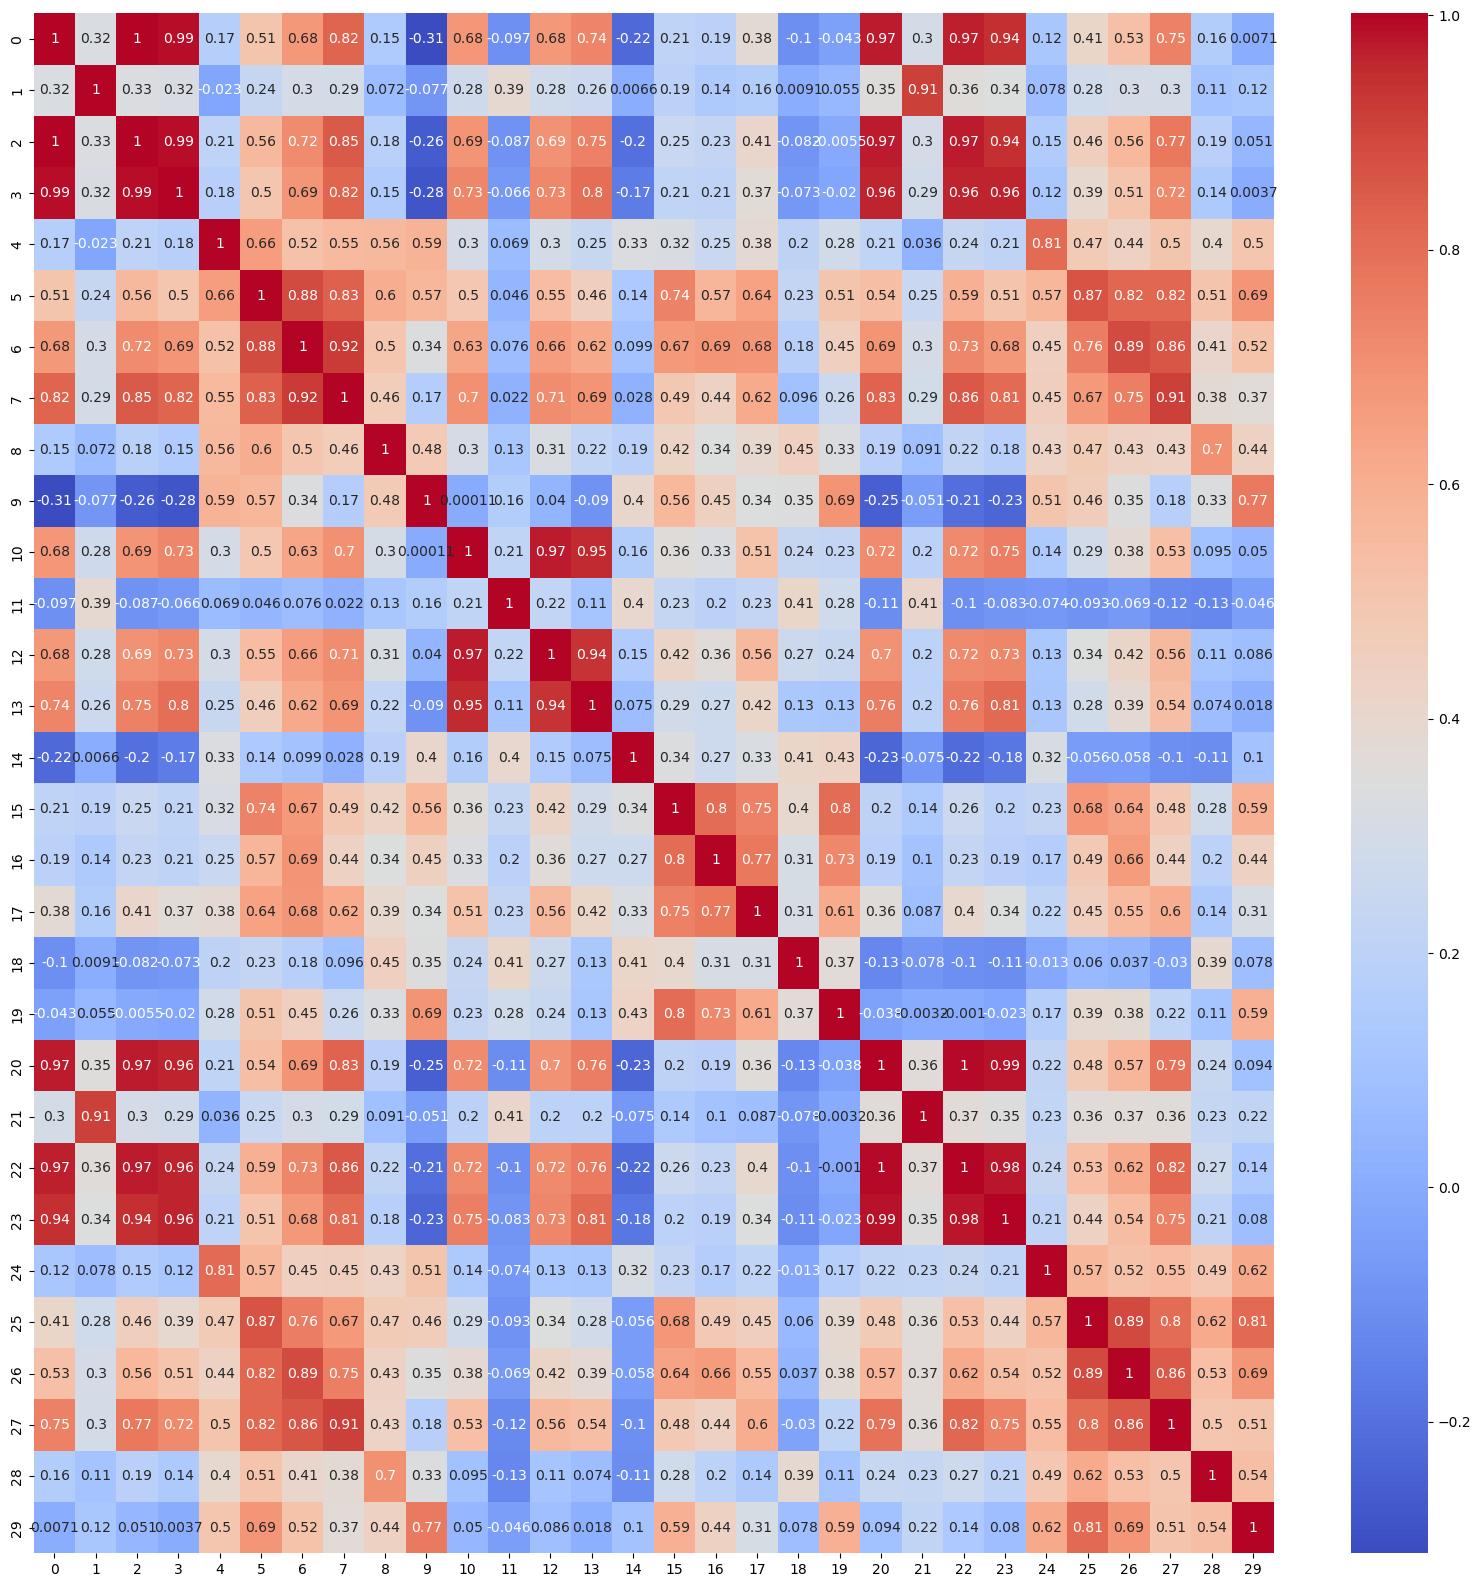

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(cov_mat, annot=True, cmap='coolwarm')

In [106]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [107]:
print("Eigen Values")
print(eig_val)

Eigen Values
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


In [108]:
print("Eigen Vectors")
print(eig_vec)

Eigen Vectors
[[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01  2.25384659e-01  7.02414091e-01
  -2.11460455e-01  2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02  2.97886446e-02  2.73661018e-04
   1.05339342e-02 -6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.87867898e-02  5.54997454e-04 -9.48006326e-02
  -2.44134993e-01 -4.483694

In [109]:
eig_vec.shape

(30, 30)

In [110]:
eig_val.shape

(30,)

In [111]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [112]:
eig_pairs

[(13.304990794374573,
  array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
         0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
         0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
         0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
         0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
         0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])),
 (5.701374603726148,
  array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
          0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
         -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
          0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
         -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
          0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])),
 (2.8229101550062277,
  array([-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919

In [113]:
eig_pairs.sort(key= lambda x: x[0], reverse=True)

In [114]:
for i in eig_pairs:
    print(i[0])

13.304990794374573
5.701374603726148
2.8229101550062277
1.9841275177302016
1.6516332423301194
1.2094822398029736
0.6764088817009053
0.4774562546895082
0.417628782107818
0.3513108748817342
0.2944331534911649
0.26162116136612046
0.2417824213283135
0.15728614921759293
0.0943006956010558
0.08000340447737636
0.0595036135304323
0.05271142221014857
0.04956470021298151
0.031214260553066243
0.030025663090428128
0.027487711338903993
0.024383691354591234
0.01808679398430473
0.015508527134418953
0.008192037117607296
0.006912612579184819
0.0015921360011975768
0.0007501214127188817
0.0001332790566633349


In [115]:
var = []
tot_var = sum(eig_val)
for i in sorted(eig_val, reverse=True):
    var.append((i/tot_var)*100)

In [116]:
var

[44.272025607526366,
 18.971182044033092,
 9.393163257431377,
 6.602134915470144,
 5.495768492346262,
 4.024522039883354,
 2.2507337129825067,
 1.5887238000213264,
 1.3896493745591119,
 1.1689781894131508,
 0.979718987598017,
 0.8705379007378811,
 0.8045249871967308,
 0.5233657454926345,
 0.3137832167627396,
 0.2662093365152299,
 0.19799679253242833,
 0.17539594502263833,
 0.16492530592251595,
 0.10386467483387,
 0.09990964637002439,
 0.09146467510543324,
 0.08113612588991101,
 0.06018335666716507,
 0.05160423791651997,
 0.027258799547750092,
 0.023001546250597388,
 0.005297792903809156,
 0.002496010324688485,
 0.00044348274273447075]

In [119]:
import cufflinks as cf
cf.go_offline()

In [125]:
X = pd.DataFrame(var, columns=['Variance'])

In [138]:
X.head()

,Variance,Range
0,44.272026,0
1,18.971182,1
2,9.393163,2
3,6.602135,3
4,5.495768,4


In [137]:
X['Range'] = range(30)

In [140]:
X.iplot(kind='bar', x='Range', y='Variance')

In [142]:
sum(var[:20])

99.5572043262814

In [143]:
from sklearn.decomposition import PCA

In [144]:
pca = PCA(n_components=20)

In [145]:
pca.fit(df)

PCA(n_components=20)

In [146]:
x_pca = pca.transform(df)

In [147]:
df.shape

(569, 30)

In [149]:
x_pca.shape

(569, 20)

In [150]:
# WE have reduced the dimensions from 30 to 20 using PCA

In [152]:
pca.components_    # Same as corresponding eigen vector 

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [153]:
eig_pairs[:1]

[(13.304990794374573,
  array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
         0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
         0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
         0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
         0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
         0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394]))]